# Social Media Analytics

# Business Understanding
Sentiment Analysis adalah penambangan kontekstual teks yang mengidentifikasi dan mengekstrak informasi subjektif dalam sumber, dan membantu para pembisnis untuk memahami sentimen sosial dari merek, produk atau layanan mereka saat memantau percakapan online. 

Pada kasus ini kita diminta untuk melakukan Exploratory Data Analysis terhadap data dari twitter pada februari 2015 tentang cuitan terhadap maskapai penerbangan di U.S

# Import Library

In [1]:
import pandas as pd 
import numpy as np

#Authentication module. for documentation  (http://docs.tweepy.org)
import tweepy as tp

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firlii064179\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
sns.set_style('whitegrid')

# Data Understanding
Diberikan data twit pengguna twitter pada bulan februari 2015 yang mana twit berisi komentar terhadap U.S Airline dan pada dataset ini setiap twit sudah diklasifikasikan menjadi 3 kelompok sentimen terhadap U.S Airline yaitu sentiment positif, netral dan negatif.

Terdapat beberapa feature yang terdapat pada dataset ini :
* tweet_id : id pengguna twitter
* airline_sentiment : Pandangan terhadap suatu airline di U.S ( Positif/Netral/Negatif) yang diperoleh dari twit
* airline_sentiment_confidence : Peluang bahwa twit tersebut  merupakan sentiment yang sesuai dengan 'airline_sentiment' .
* negativereason : Alasan mengapa mengetwit berupa sentiment negatif (
* negativereason_confidence : Peluang bahwa twit tersebut disebabkan oleh 'negativereason'
* airline : maskapai penerbangan
* airline_sentiment_gold : -
* name : username pengguna twitter
* negative_reason_gold :-
* text : isi dari twit
* tweet_coord :-	
* tweet_created	: waktu twit dilakukan
* tweet_location : lokasi twit dilakukan
* user_timezone : waktu daerah setempat

## Import Dataset 

In [3]:
df=pd.read_csv('tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [4]:
#Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-null float64
airline                         14485 non-null object
airline_sentiment_gold          40 non-null object
name                            14485 non-null object
negativereason_gold             32 non-null object
retweet_count                   14485 non-null int64
text                            14485 non-null object
tweet_coord                     1007 non-null object
tweet_created                   14485 non-null object
tweet_location                  9798 non-null object
user_timezone                   9710 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [5]:
# Ukuran dataset
df.shape

(14485, 15)

## Missing Value
Terdapat 3 feature yang jumlah data yang hilangnya lebih dari 90% dan terdapat 4 feature yang data hilangnya sekitar 28 s.d 38% dari total keseluruhan data

In [6]:
percentage = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
percentage

negativereason_gold             99.78
airline_sentiment_gold          99.72
tweet_coord                     93.05
negativereason                  37.30
user_timezone                   32.97
tweet_location                  32.36
negativereason_confidence       28.09
tweet_created                    0.00
text                             0.00
retweet_count                    0.00
name                             0.00
airline                          0.00
airline_sentiment_confidence     0.00
airline_sentiment                0.00
tweet_id                         0.00
dtype: float64

# Data Preparation

## A. Data Text Preprocessing

### 1. Lower Casing
Mengubah semua twit menjadi huruf kecil

In [7]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

0    @jetblue's new ceo seeks the right balance to ...
1    @jetblue is really getting on my nerves !! 😡😡 ...
2    @united yes. we waited in line for almost an h...
3    @united the we got into the gate at iah on tim...
4    @southwestair its cool that my bags take a bit...
Name: text, dtype: object

### 2. Punctuation removal
Menghapus tanda baca pada twit

In [8]:
# pat1 = r'@[A-Za-z0-9_]+'
# pat2 = r'https?://[^ ]+'
# combined_pat = r'|'.join((pat1, pat2))
# dataframe['text'] = dataframe['text'].str.replace(combined_pat,'')
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'].head()

0    jetblues new ceo seeks the right balance to pl...
1    jetblue is really getting on my nerves   nothappy
2    united yes we waited in line for almost an hou...
3    united the we got into the gate at iah on time...
4    southwestair its cool that my bags take a bit ...
Name: text, dtype: object

### 3. Stopwords removal
Menghapus kata umum (common word) pada twit. Contoh kata umum yang disini merukuk kata umum dalam bahasa inggris misalnya kata 'The' atau 'of' 

In [9]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head(10)

0    jetblues new ceo seeks right balance please pa...
1               jetblue really getting nerves nothappy
2    united yes waited line almost hour passengers ...
3    united got gate iah time given seats closed fl...
4    southwestair cool bags take bit longer dont gi...
5    united dont hope nicer flight time try things ...
6    united like delays less im one plane connect v...
7    united link current status flightsairports fly...
8    southwestair guys hour 2 phone hold 3am bc vol...
9                 united tried 2 dm would go thru sure
Name: text, dtype: object

### 4. Frequent words removal
Menghilangkan kata yang sering muncul. Pada kasus kali ini akan dihapus 8 kata yang paling sering muncul

In [10]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:8]
freq

united          4142
flight          3823
usairways       3043
americanair     2801
southwestair    2452
jetblue         2360
get             1327
thanks          1052
dtype: int64

In [11]:
freq = list(freq.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0    jetblues new ceo seeks right balance please pa...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate iah time given seats closed know peop...
4    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

### 5. Rare words removal
Menghilangkan kata yang paling jarang muncul. Pada kasus ini kana dihilangkan 20 kata yang paling tidak sering muncul dalam twit

In [12]:
rare_word = pd.Series(' '.join(df['text']).split()).value_counts()[-20:]
rare_word

imessage             1
phoneonline          1
ua1619               1
debbie               1
upholding            1
protocols            1
unplanned            1
mqxc64               1
ccicanine            1
mcmullen             1
904                  1
pp                   1
mrjustyn             1
greyhoundbus         1
3935                 1
whereas              1
babys                1
httptcodkzl57upqi    1
velcro               1
httptcoazltjhf7lv    1
dtype: int64

In [13]:
rare_word = list(rare_word.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()

0    jetblues new ceo seeks right balance please pa...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate iah time given seats closed know peop...
4    cool bags take bit longer dont give baggage bl...
Name: text, dtype: object

### 6. Spelling Correction
Mengkoreksi pengejaan kata dalam bahasa inggris pada twit yang dibuat

In [14]:
df['text'][:6].apply(lambda x: str(TextBlob(x).correct()))

0    jetblues new co seeks right balance please pas...
1                       really getting nerves nothappy
2    yes waited line almost hour passengers left wa...
3    got gate ah time given seats closed know peopl...
4    cool bags take bit longer dont give baggage bl...
5    dont hope nicer time try things right sold tic...
Name: text, dtype: object

### 7. Lematization
Mengubah isi kata twit menjadi kata dasarnya. Pada kasus ini akan dibuat menjadi kata dasar dalam bahasa inggris

In [15]:
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0    jetblues new ceo seek right balance please pas...
1                        really getting nerve nothappy
2    yes waited line almost hour passenger left wan...
3    got gate iah time given seat closed know peopl...
4    cool bag take bit longer dont give baggage blu...
Name: text, dtype: object

## B. Handing Missing Value 

In [16]:
percentage = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
percentage

negativereason_gold             99.78
airline_sentiment_gold          99.72
tweet_coord                     93.05
negativereason                  37.30
user_timezone                   32.97
tweet_location                  32.36
negativereason_confidence       28.09
tweet_created                    0.00
text                             0.00
retweet_count                    0.00
name                             0.00
airline                          0.00
airline_sentiment_confidence     0.00
airline_sentiment                0.00
tweet_id                         0.00
dtype: float64

Feature yang memiliki persentase data hilangnya lebih dari 90% akan dihapus

In [17]:
#Menghapus Feature
df=df.drop(['negativereason_gold','airline_sentiment_gold','tweet_coord'],axis=1)

Untuk feature lainnya yang memiliki missing value akan dibiarkan terlebih dahulu dan akan dilihat setelah melakukan EDA apa ada kemungkinan mengisi missing value selain dari nilai modus atau median dari feature yang memiliki missing value tersebut

# Exploratory Data Analysis

In [18]:
#Statistika deskriptif untuk feature yang bertipe numerik
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.448500e+04,14485.000000,10416.000000,14485.000000
mean,5.692072e+17,0.899958,0.637874,0.083397
std,7.756739e+14,0.162961,0.330636,0.749632
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685515e+17,0.692300,0.360375,0.000000
50%,5.694398e+17,1.000000,0.670600,0.000000
75%,5.698811e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [19]:
#Ukuran Dataset
df.shape

(14485, 12)

In [20]:
#Banyak username yang melakukan twit
df.name.nunique()

7701

Perhatikan bahwa banyaknya username yang melakukan twit sebanyak 7701 dan nilai ini kurang dari banyaknya data yaitu 14485 yang artinya terdapat pengguna twitter yang melakukan twit lebih dari 1 kali.

Untuk lebih jelasnya lihat daftar berikut :

In [21]:
df.name.value_counts().head(10)

JetBlueNews        63
kbosspotter        32
_mhertz            29
otisday            28
throthra           27
rossj987           23
weezerandburnie    22
GREATNESSEOA       22
scoobydoo9749      21
MeeestarCoke       20
Name: name, dtype: int64

Terdapat banyak pengguna twitter yang melakukan twit lebih dari 1 kali  yang mengomentari terkait maksapai penerbangan di U.S

## Distribusi airline_sentiment dan Nilai Confidence

Text(0.5,1,'Distribusi airline sentiment confidence')

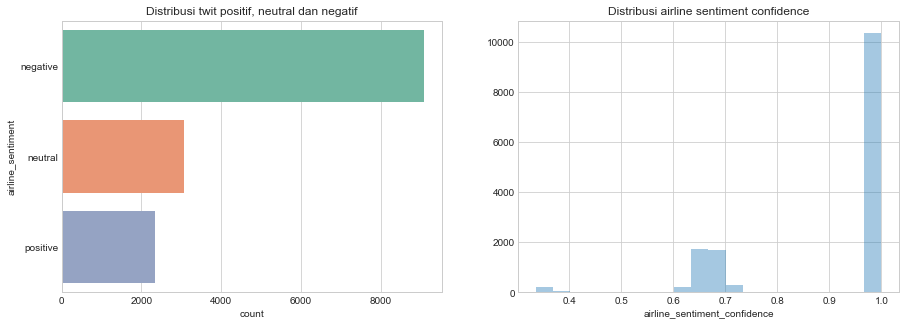

In [22]:
fig=plt.figure(figsize=(15,5))
#Plot distribusi twit positive, neutral dan negative
ax1=fig.add_subplot(1,2,1)
sns.countplot(y=df['airline_sentiment'],palette='Set2',order=df['airline_sentiment'].value_counts().index)
ax1.set_title('Distribusi twit positif, neutral dan negatif')

ax2=fig.add_subplot(1,2,2)
sns.distplot(df['airline_sentiment_confidence'],kde=False,bins=20)
ax2.set_title('Distribusi airline sentiment confidence')

Jika diperhatikan, jumlah paling banyak twit merupakan sentiment negatif terhadap maskapai penerbangan di U.S ( sekitar 9000 twit) dan banyaknya twit negatif 4 kalinya dari jumlah twit setiment positif ( berkisar 2200 ) dan untuk jumlah twit yang sentiment netral berkisar di 3000an.

Lalu untuk distribusi confidencenya mayoritas bernilai 1.0 artinya bahwa mayoritas twit yang dibuat merupakan sentiment terhadap maskapai yang sebenarnya. 

## Distribusi twit yang mengomentari setiap maskapai penerbangan

Text(0.5,1,'Distribusi twit untuk setiap maskapai penerbangan')

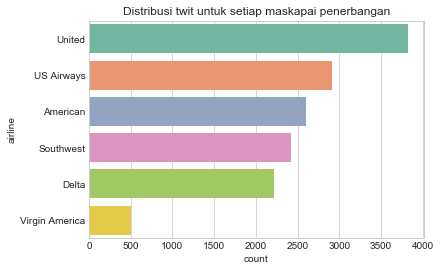

In [23]:
sns.countplot(y=df['airline'].sort_values(),palette='Set2',order=df['airline'].value_counts().index)
plt.title('Distribusi twit untuk setiap maskapai penerbangan')

pengguna twitter paling banyak mengomentari maskapai United yaitu hampir 4000 cuitan yang mengomentari maskapai ini. Selanjutnya paling banyak mengomentari US Airways, American, Southwest dan Delta yang terdapat 2000 s.d 3000 cuitan. Maskapai yang paling sedikit mendapat twit komentar adalah Virgin America sekitar 500 twit

## Distribusi twit positif, negatif dan netral untuk setiap maskapai penerbangan

Text(0.5,1,'Distribusi twit positif negatif dan netral untuk setiap maskapai penerbangan')

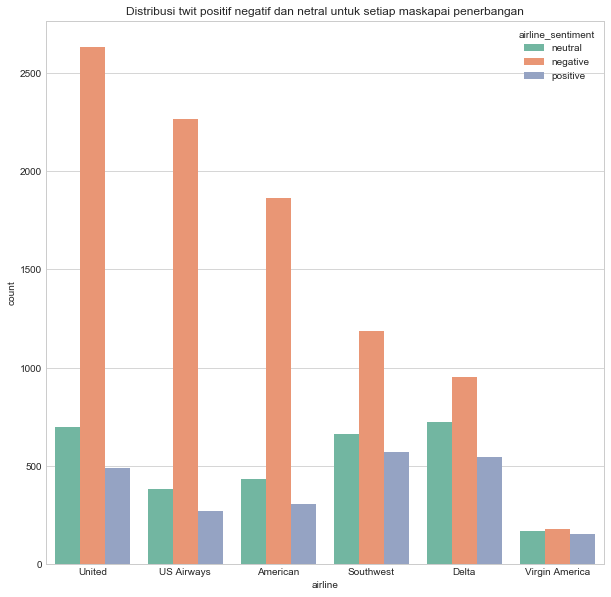

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x='airline',data=df,hue='airline_sentiment',palette='Set2',order=df['airline'].value_counts().index)
plt.title('Distribusi twit positif negatif dan netral untuk setiap maskapai penerbangan')

* Secara umum semua maskapai lebih banyak dikomentari negatif dibandingkan komentar positif maupun netral termasuk maskapai Virgin America. Maskapai United paling banyak dikomentari negatif dibandingkan maskapai lainnya sedangkan maskapai Virgin America mendapat komentar negatif paling sedikit. Hal ini cukup masuk akal jika dilihat dari distribusi twit yaitu United yang paling banyak mendapat komentar twit dan maskapai Virgin America yang paling sedikit mendapatkan komentar twit.

* Komentar positif selalu paling sedikit dibandingkan komentar negatif atau netral untuk setiap maskapai penerbangan


## Distribusi negative reason dan nilai confidencenya

Text(0.5,1,'Distribusi nilai confidence untuk negativereason')

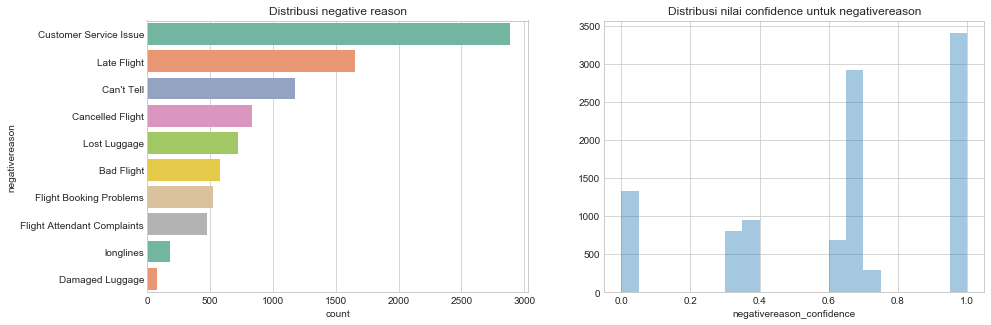

In [25]:
fig=plt.figure(figsize=(15,5))

#Distribusi negativereason
ax1=fig.add_subplot(1,2,1)
sns.countplot(y=df['negativereason'],order=df['negativereason'].value_counts().index,palette='Set2')
ax1.set_title('Distribusi negative reason')

#Distribusi nilai confidence untuk negativereason
ax2=fig.add_subplot(1,2,2)
sns.distplot(df[df['negativereason_confidence'].notnull()]['negativereason_confidence'],kde=False,hist=True,bins=20)
ax2.set_title('Distribusi nilai confidence untuk negativereason')


* Paling banyak komentar mengenai Customer Service Issu hampir 3000 twit disebabkan oleh masalah ini. Selanjutnya disebabkan oleh masalah Late Flight dan untuk tidak bisa menceritakan (can't tell) mengapa memberi komentar negatif cukup banyak juga yaitu sekitar 1200 twit.
* Untuk nilai confidence paling banyak bernilai 1 dan direntang 0.6 s.d 0.75 , artinya alasan negativereason kemungkinan benarnya tinggi. Namun jika diperhatikan banyak juga twit yang nilai confidencenya dibawah 0.1 yaitu sekitar 1300 twit artinya bahwa alasan negativereason pada twit tersebut masih belum bisa dipercaya

## Distribusi negativereason untuk setiap maskapai penerbangan

Text(0.5,1,'Distribusi negativereason untuk setiap maskapai')

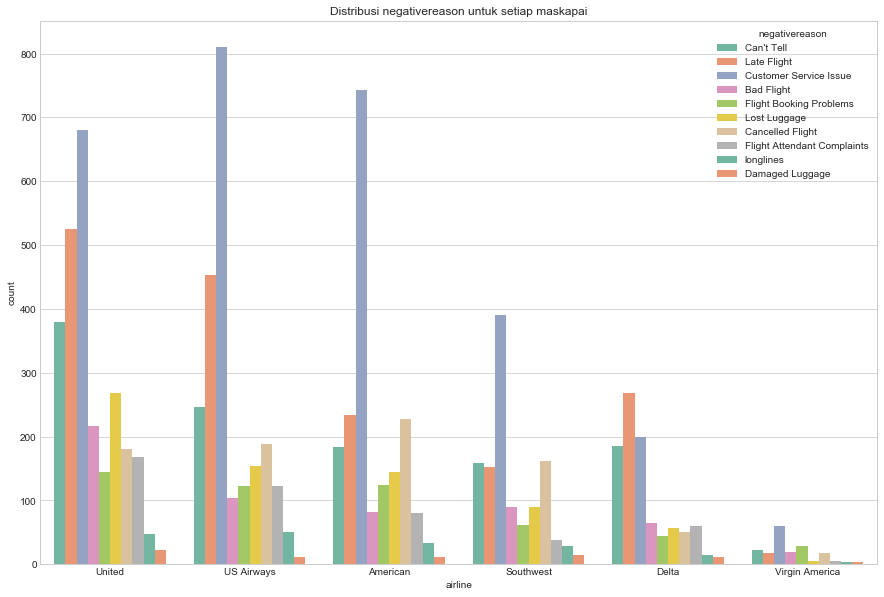

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(x='airline',data=df,hue='negativereason',palette='Set2', order=df['airline'].value_counts().index)
plt.title('Distribusi negativereason untuk setiap maskapai')

* Secara umum maskapai United, US Airwats, American, Southwest dan Virgin America mendapat komentar negatif disebabkan paling banyak terkait alasan Customer Services Issue dan untuk maskapai Delta disebabkan paling banyak terkait alasan Late Flight
* Twit yang paling banyak mengomentari masalah Customer Services Issue ada di maskapai US Airways lebih dari 800 twit

## 7 Lokasi dan waktu daerah yang paling banyak twit dibuat

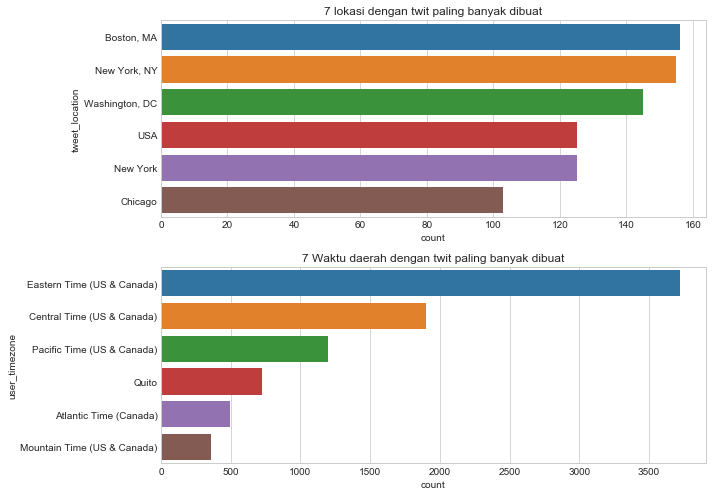

In [27]:
fig=plt.figure(figsize=(10,7))

#7 Lokasi daerah
ax1=fig.add_subplot(2,1,1)
sns.countplot(y=df['tweet_location'],order=df['tweet_location'].value_counts().index[:6])
ax1.set_title('7 lokasi dengan twit paling banyak dibuat')

#7 Waktu daerah
ax2=fig.add_subplot(2,1,2)
sns.countplot(y=df['user_timezone'],order=df['user_timezone'].value_counts().index[:6])
ax2.set_title('7 Waktu daerah dengan twit paling banyak dibuat')

plt.tight_layout()

* 7 Lokasi paling banyak membuat twit adalah Boston MA, New York NY, Washington DC, New York, USA dan Chicago
* 7 Waktu daerah yang paling banyak membuat twit adalah Eastern Time, Central Time, Pacific Time, Quito, Atlantic TIme dan Mountain Time dan jika diperhatikan lebih lanjut lebih dari 3500 twit dilakukan di waktu Eastern Time (US & Canada)

## WordCloud

In [28]:
#definisikan positive, netural dan negative
positive = df.loc[df['airline_sentiment'] == "positive"]
neutral= df.loc[df['airline_sentiment'] == "neutral"]
negative= df.loc[df['airline_sentiment'] == "negative"]

In [29]:
#menggabungkan semua twit menjadi satu paragram
all_twit_positive = "".join(positive.text.values)
all_twit_negative = "".join(negative.text.values)
all_twit_neutral  = "".join(neutral.text.values)

In [30]:
#text = happy.Description
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Kata yang sering muncul pada twit sentiment positif

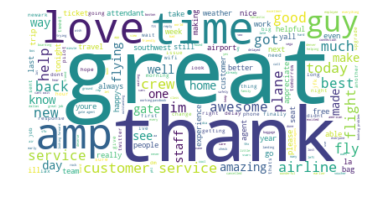

In [31]:
create_word_cloud(all_twit_positive)

### Kata yang sering muncul pada twit sentiment netral

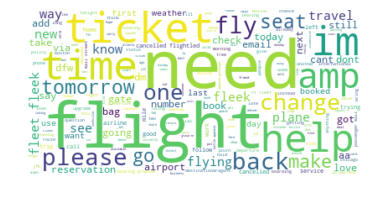

In [34]:
create_word_cloud(all_twit_neutral)

### Kata yang sering muncul pada twit sentiment negatif

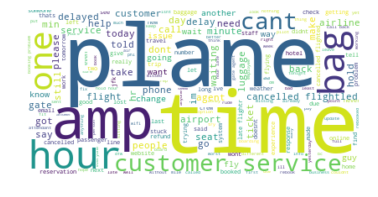

In [36]:
create_word_cloud(all_twit_negative)

## Kita juga bisa melihat kata apa yang paling sering muncul pada twit untuk maskapai tertentu
Pada contoh ini akan digunakan maskapai United dikarenakan paling banyak mendapatkan komentan di twitter

In [39]:
#definisikan positive, netural dan negative untuk suatu maskapai
positive = df.loc[(df['airline_sentiment'] == "positive") & (df['airline']=='United')]
neutral= df.loc[(df['airline_sentiment'] == "neutral") & (df['airline']=='United')]
negative= df.loc[(df['airline_sentiment'] == "negative") & (df['airline']=='United')]

#menggabungkan semua twit menjadi satu paragram
all_twit_positive = "".join(positive.text.values)
all_twit_negative = "".join(negative.text.values)
all_twit_neutral  = "".join(neutral.text.values)

### Kata yang sering muncul pada twit sentiment positif untuk maskapai United

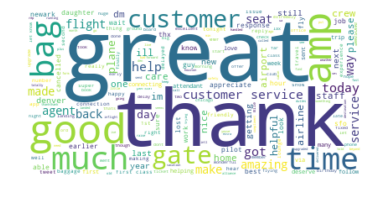

In [42]:
create_word_cloud(all_twit_positive)

### Kata yang sering muncul pada twit sentiment netral untuk maskapai United

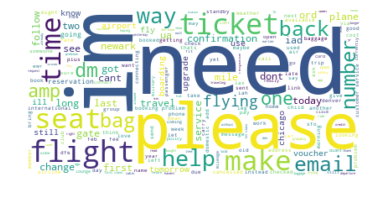

In [43]:
create_word_cloud(all_twit_neutral)

### Kata yang sering muncul pada twit sentiment negatif untuk maskapai United

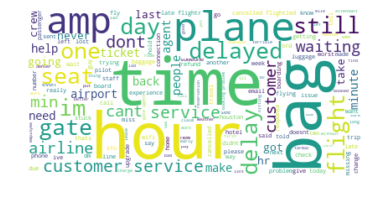

In [44]:
create_word_cloud(all_twit_negative)

# Conclusion

* Secara keseluruhan twit berisi sentiment negatif mempunyai jumlah paling banyak dibandingkan dengan yang lain
* Maskapai United merupakan maskapai yang paling banyak mendapatkan komentar di twitter
* Customer Service Issue merupakan penyebab masalah utama yang mengakibatkan banyak twit negatif untuk setiap maskapai 
* Boston MA merupakan lokasi paling banyak twit dilakukan namun dengan daerah lainnya seperti New York dan Washington tidak terpaut jauh jumlah twit yang dibuat
* Eastern Time (US & Canada) merupakan waktu daerah paling banyak twit dilakukan
* Kata great, thank dan love adalah kata yang paling banyak di twit untuk sentiment positif
* Kata flight, need dan time adalah kata yang paling banyak di twit untuk sentiment netral
* Kata plane, amp dan time adalah kata yang paling banyak di twit untuk sentiment negatif